In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from collections import Counter
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("../data/NewsPortfolio.csv")
df.head()

,時間戳記,1. 請問您的職業為？,2. 請問您是否有玩過股票的經驗？,3. 請問您是否有興趣玩股票？,4. 請問您是否有意願使用 NewsPortfolio ？,5. 反饋 (e.g. 我希望NewsPortfolio能加入什麼功能)
0,2020/7/25 下午 4:39:17,學生,否,是,是,無
1,2020/7/25 下午 5:11:06,資訊業,是,是,是,新聞是一種很容易可以被操控的東西，是否有辦法針對搜索到的訊息做核實我認為很重要。
2,2020/7/25 下午 5:19:22,學生,否,是,是,目前沒想到
3,2020/7/25 下午 5:48:50,學生,否,否,否,無
4,2020/7/25 下午 7:04:00,服務業,否,是,是,曲線走勢示意


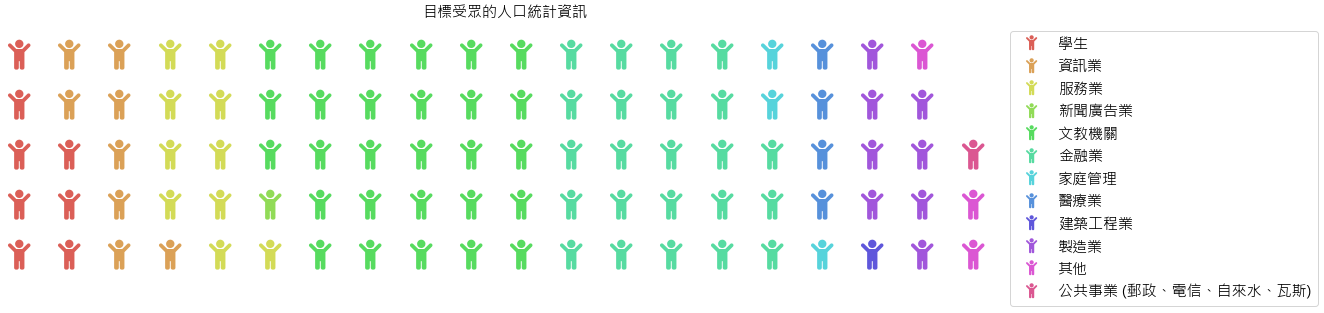

In [3]:
occupation_dict = dict(Counter(df.iloc[:, 1]))

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=occupation_dict, 
    colors=sns.color_palette("hls", len(occupation_dict)),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 15},
    icons='child', icon_size=30, 
    icon_legend=True
)
fig.set_size_inches(18.5, 10.5)
plt.title("目標受眾的人口統計資訊", fontdict={'fontsize': 15}, loc="center")
plt.show()

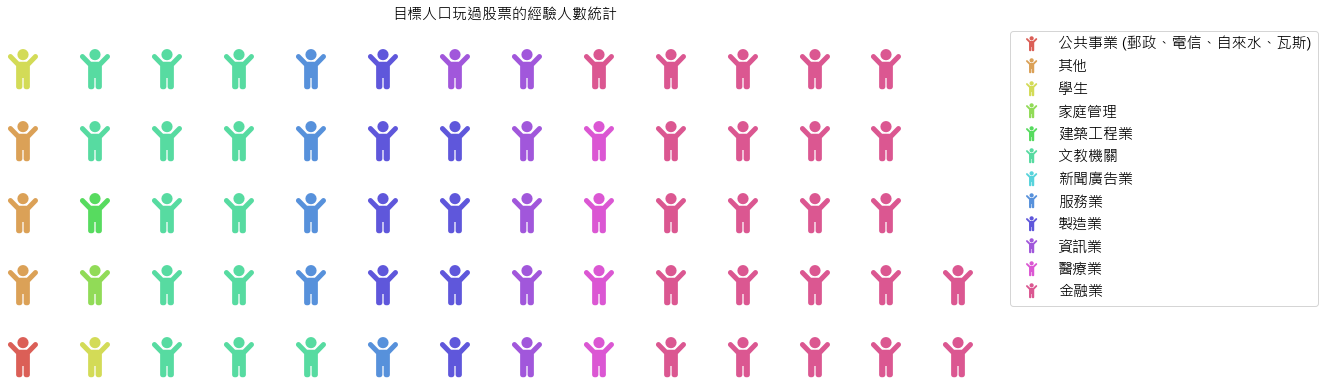

In [4]:
df["Stock Exp"] = df["2. 請問您是否有玩過股票的經驗？"].apply(lambda x: 1 if x == "是" else 0)
stock_exp_dict = dict(df.groupby("1. 請問您的職業為？")["Stock Exp"].agg(sum))

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=stock_exp_dict, 
    colors=sns.color_palette("hls", len(stock_exp_dict)), 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 15},
    icons='child', icon_size=40, 
    icon_legend=True
)
fig.set_size_inches(18.5, 10.5)
plt.title("目標人口玩過股票的經驗人數統計", fontdict={'fontsize': 15}, loc="center")
plt.show()

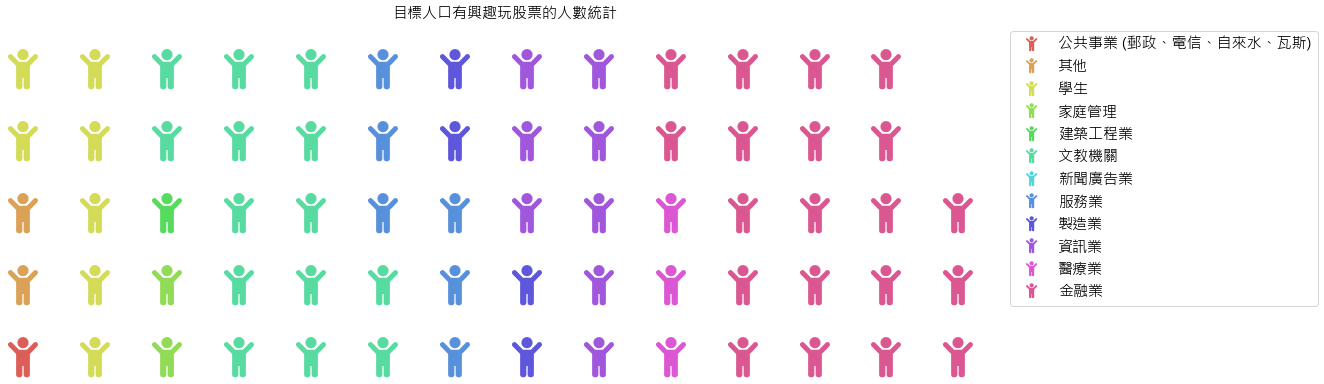

In [5]:
df["Stock Int"] = df["3. 請問您是否有興趣玩股票？"].apply(lambda x: 1 if x == "是" else 0)
stock_exp_dict = dict(df.groupby("1. 請問您的職業為？")["Stock Int"].agg(sum))

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=stock_exp_dict, 
    colors=sns.color_palette("hls", len(stock_exp_dict)), 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 15},
    icons='child', icon_size=40, 
    icon_legend=True
)
fig.set_size_inches(18.5, 10.5)
plt.title("目標人口有興趣玩股票的人數統計", fontdict={'fontsize': 15}, loc="center")
plt.show()

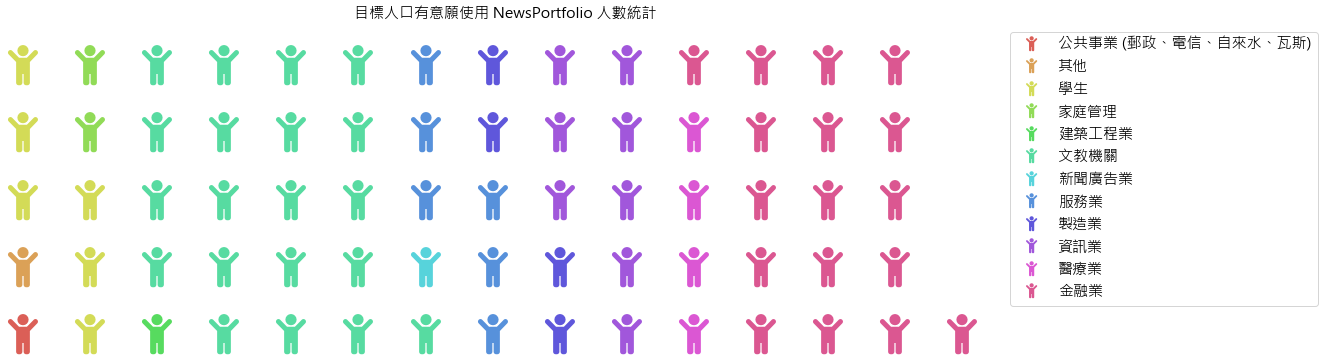

In [6]:
df["NewsPortfolio Willingness"] = df["4. 請問您是否有意願使用 NewsPortfolio ？"].apply(lambda x: 1 if x == "是" else 0)
stock_exp_dict = dict(df.groupby("1. 請問您的職業為？")["NewsPortfolio Willingness"].agg(sum))

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=stock_exp_dict, 
    colors=sns.color_palette("hls", len(stock_exp_dict)), 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 15},
    icons='child', icon_size=40, 
    icon_legend=True
)
fig.set_size_inches(18.5, 10.5)
plt.title("目標人口有意願使用 NewsPortfolio 人數統計", fontdict={'fontsize': 15}, loc="center")
plt.show()

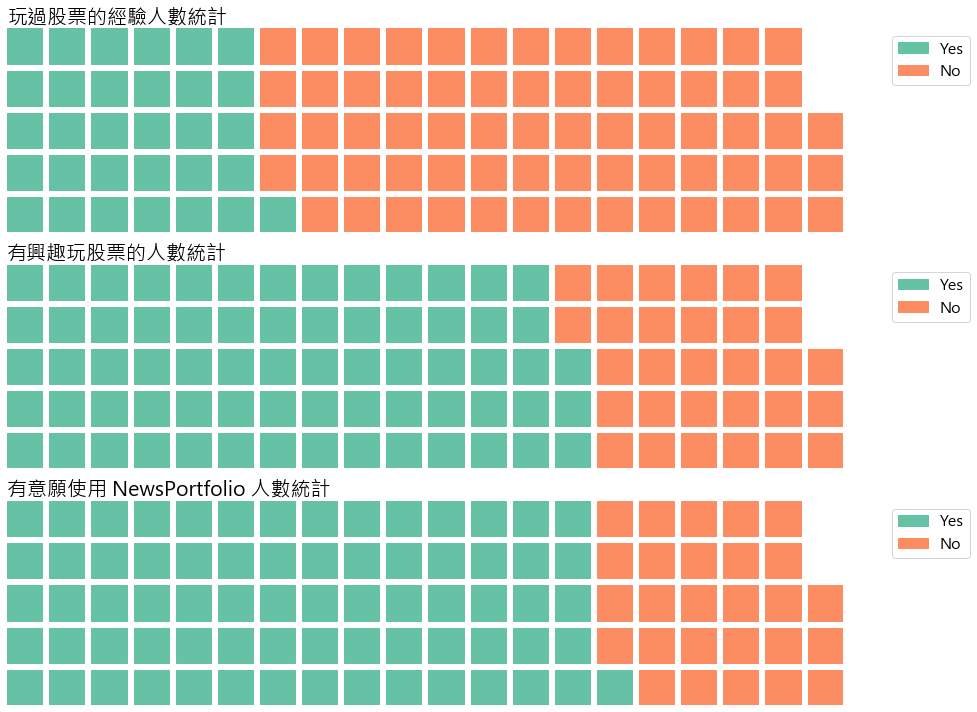

In [7]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': dict(Counter(df["Stock Exp"])),
            'labels': ["Yes", "No"],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 15},
            'title': {'label': '玩過股票的經驗人數統計', 'loc': 'left', 'fontsize': 20}
        },
        '312': {
            'values': dict(Counter(df["Stock Int"])),
            'labels': ["Yes", "No"],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 15},
            'title': {'label': '有興趣玩股票的人數統計', 'loc': 'left', 'fontsize': 20}
        },
        '313': {
            'values': dict(Counter(df["NewsPortfolio Willingness"])),
            'labels': ["Yes", "No"],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 15},
            'title': {'label': '有意願使用 NewsPortfolio 人數統計', 'loc': 'left', 'fontsize': 20}
        },
    },
    rows=5,
    figsize=(15, 10)
)
plt.tight_layout()
plt.show()